In [1]:
from abcd_graph import Graph, ABCDParams
from abcd_graph.utils import seed
from abcd_graph.callbacks import StatsCollector, Visualizer, PropertyCollector

# Building a graph

Before building an ABCD graph, we will set our seed and initalize the various callbacks to use for data collection later. 

In [2]:
seed(42)

stats = StatsCollector()
vis = Visualizer()
props = PropertyCollector()

We will now build an ABCD graph on 100 vertices using our default parameters. A concise description of the parameters can be found in Section 2.3 [here](https://math.ryerson.ca/~pralat/papers/2022_modularity-abcd.pdf). We will experiment with the parameters later in the demo.

In [3]:
params = ABCDParams()
G = Graph(params, n=100, callbacks=[stats, vis, props])
G.build()
print(params)

gamma=2.5 delta=5 zeta=0.5 beta=1.5 s=20 tau=0.8 xi=0.25


If all you need is (a) the edges and (b) the communities, then you can do the following: 

In [4]:
E = G.exporter.to_edge_list()
communities = props.vertex_partition

# Exporting

We currently offer 5 exports. The most straightforward of these is as a list of edges, which returns the edges as a 2D array. 

In [5]:
E = G.exporter.to_edge_list()
print(E[:10])

[[75 46]
 [93 38]
 [84  3]
 [66 43]
 [30 26]
 [80 25]
 [70  7]
 [62  0]
 [94 80]
 [64  3]]


We can also export the adjacency matrix, with an option to use a sparse matrix.

In [6]:
M_adj = G.exporter.to_adjacency_matrix()
M_adj_sparse = G.exporter.to_sparse_adjacency_matrix()
print(M_adj_sparse[0])

  (0, 18)	True
  (0, 21)	True
  (0, 22)	True
  (0, 62)	True
  (0, 93)	True


Finally, we can export to both igraph and networkx.

In [7]:
G_ig = G.exporter.to_igraph()
G_nx = G.exporter.to_networkx()
print(type(G_ig), type(G_nx))

<class 'igraph.Graph'> <class 'networkx.classes.graph.Graph'>


# Statistics

We use StatsCollector().statistics to obtain the a dictionary of statistics for our ABCD graph.

In [8]:
stats.statistics

{'model_used': 'configuration_model',
 'params': ABCDParams(gamma=2.5, delta=5, zeta=0.5, beta=1.5, s=20, tau=0.8, xi=0.25),
 'number_of_nodes': 100,
 'start_time': datetime.datetime(2024, 9, 9, 19, 21, 31, 151878),
 'end_time': datetime.datetime(2024, 9, 9, 19, 21, 31, 154146),
 'time_to_build': 0.0022549480199813843,
 'number_of_edges': 321,
 'number_of_communities': 4,
 'expected_average_degree': 6.52002839527186,
 'actual_average_degree': 6.42,
 'expected_average_community_size': 27.7585580858053,
 'actual_average_community_size': 25.0,
 'number_of_loops': 8,
 'number_of_multi_edges': 14,
 'empirical_xi': 0.2461059190031153}

# Properties

We use PropertyCollector() to obtain the various properties of our ABCD graph. Let us start with the communities. Note that the vertex labels in a community will always be a range, with the first community containing vertex 0 and the last community containing vertex n-1.

In [9]:
partition = props.vertex_partition
for community in partition:
    print("community",community,"contains vertices labelled",
          partition[community][0],"through",partition[community][-1])

community 0 contains vertices labelled 0 through 29
community 1 contains vertices labelled 30 through 55
community 2 contains vertices labelled 56 through 79
community 3 contains vertices labelled 80 through 99


The degree sequence is also found here. Note that the community size sequence can be gathered directly from the above partition.

In [10]:
d_seq = props.degree_sequence
d_min = min(d_seq.values())
d_max = max(d_seq.values())
num_min = len([i for i in d_seq if d_seq[i] == d_min])
num_max = len([i for i in d_seq if d_seq[i] == d_max])
print("The minimum degree is",d_min,"and",num_min,"vertices have this degree.")
print("The maximum degree is",d_max,"and",num_max,"vertices have this degree.")

The minimum degree is 5 and 43 vertices have this degree.
The maximum degree is 11 and 1 vertices have this degree.


We can also get the xi-matrix here. In this matrix, cell (i, j) is the number of edges between community i and community j, normalized by the expected number. This is also the case when i = j, i.e., cell (i, i) is the number of edges within community i, normalized by the expected number. In theory, all diagonal cells should be very close to 1 and the remaining cells should resemble samples from a normalized binomial distribution. 

In [11]:
M_xi = props.xi_matrix
print(M_xi)

[[1.0031746  0.98987854 1.23734818 1.30608974]
 [0.98987854 1.01265823 1.24168975 0.83406433]
 [1.23734818 1.24168975 0.97652582 0.95321637]
 [1.30608974 0.83406433 0.95321637 0.96969697]]


Finally, we can find the CDFs for the degree sequence and community size sequence here. We will address these in the next section.

# Visualization

For n <= 100, we offer a quick drawing tool for our ABCD graph. 

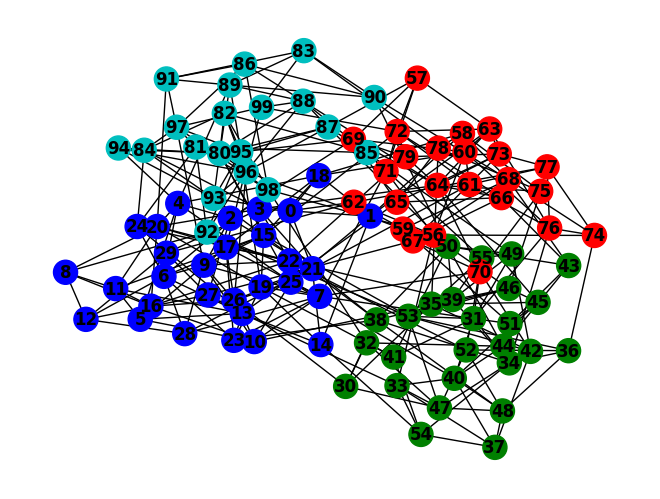

In [12]:
vis.draw_communities()

We can also draw the CDFs for both the degree sequence and the communitiy size sequence. In both cases, the actual CDFs are compared with the theoretical CDFs.

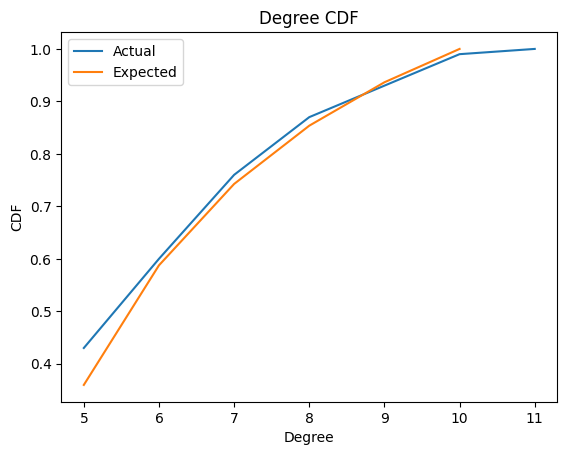

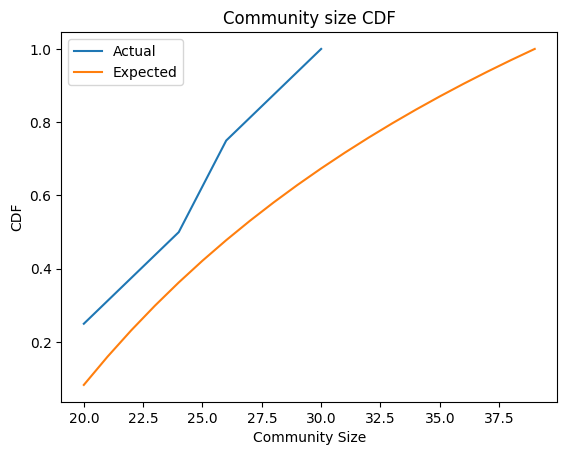

In [13]:
vis.draw_degree_cdf()
vis.draw_community_cdf()

# Modifying parameters

The ABCD graph has 7 parameters, excluding the number of vertices. Let us recall them.

In [14]:
print(params)

gamma=2.5 delta=5 zeta=0.5 beta=1.5 s=20 tau=0.8 xi=0.25


Now let us modify some of these parameters and build a new graph.

In [15]:
gamma = 3.1
beta = 2.1

params = ABCDParams(gamma=gamma, beta=beta)
G = Graph(params, n=100, callbacks=[stats, vis, props])

ValidationError: 2 validation errors for ABCDParams
gamma
  Value error, gamma must be between 2 and 3 [type=value_error, input_value=3.1, input_type=float]
    For further information visit https://errors.pydantic.dev/2.8/v/value_error
beta
  Value error, beta must be between 1 and 2 [type=value_error, input_value=2.1, input_type=float]
    For further information visit https://errors.pydantic.dev/2.8/v/value_error

Here, an error was raised since the parameters of the ABCD model each come with some restrictions. In this case, we were not allowed to choose gamma outside of 2 and 3, nor beta outside of 1 and 2. 

Let us try again with vaild parameters

In [16]:
gamma = 3
beta = 2
params = ABCDParams(gamma=gamma, beta=beta)
G = Graph(params=params, n=100, callbacks=[stats]).build()
stats.statistics

{'model_used': 'configuration_model',
 'params': ABCDParams(gamma=3.0, delta=5, zeta=0.5, beta=2.0, s=20, tau=0.8, xi=0.25),
 'number_of_nodes': 100,
 'start_time': datetime.datetime(2024, 9, 9, 19, 21, 37, 316246),
 'end_time': datetime.datetime(2024, 9, 9, 19, 21, 37, 318403),
 'time_to_build': 0.002141715958714485,
 'number_of_edges': 306,
 'number_of_communities': 3,
 'expected_average_degree': 6.349116565883841,
 'actual_average_degree': 6.12,
 'expected_average_community_size': 27.19259594538608,
 'actual_average_community_size': 33.333333333333336,
 'number_of_loops': 6,
 'number_of_multi_edges': 7,
 'empirical_xi': 0.25163398692810457}

The speed of the ABCD construction process is highly dependent on the number of loops and multi-edges generated, since each of these collisions needs to be rewired. As a rule of thumb, smaller gamma and larger delta imply a longer build time. 

In [17]:
g_list = [2.1, 2.5, 2.9]
for gamma in g_list:
    params = ABCDParams(gamma=gamma)
    G = Graph(params=params, n=100_000, callbacks=[stats]).build()
    print('gamma = ',gamma)
    print('number of collisions = ',stats.statistics['number_of_loops']+stats.statistics['number_of_multi_edges'])
    print('time_to_build = ',stats.statistics['time_to_build'],'\n')

gamma =  2.1
number of collisions =  47614
time_to_build =  10.845668913796544 

gamma =  2.5
number of collisions =  18079
time_to_build =  3.6381418127566576 

gamma =  2.9
number of collisions =  7852
time_to_build =  1.8698704857379198 



In [18]:
d_list = [2, 5, 8]
for delta in d_list:
    params = ABCDParams(delta=delta)
    G = Graph(params=params, n=100_000, callbacks=[stats]).build()
    print('delta = ',delta)
    print('number of collisions = ',stats.statistics['number_of_loops']+stats.statistics['number_of_multi_edges'])
    print('time_to_build = ',stats.statistics['time_to_build'],'\n')

delta =  2
number of collisions =  4455
time_to_build =  1.0238338503986597 

delta =  5
number of collisions =  18480
time_to_build =  3.5860376190394163 

delta =  8
number of collisions =  32033
time_to_build =  8.26181917078793 

